<a href="https://colab.research.google.com/github/MonickWeber/AdoptionDog/blob/master/AdoptionDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

adoption = pd.read_csv('https://raw.githubusercontent.com/MonickWeber/AdoptionDog/master/Dogdata.csv', sep=';')
adoption.head()

,ID,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,0,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,2,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
adoption.shape

(2934, 18)

In [3]:
adoption.columns

Index(['ID', 'age', 'sex', 'breed', 'date_found', 'adoptable_from', 'posted',
       'color', 'coat', 'size', 'neutered', 'housebroken', 'likes_people',
       'likes_children', 'get_along_males', 'get_along_females',
       'get_along_cats', 'keep_in'],
      dtype='object')

In [4]:
adoption.describe()

,ID,age
count,2934.00000,2934.000000
mean,1466.50000,8.574052
std,847.11717,4.138179
min,0.00000,0.150000
25%,733.25000,5.830000
50%,1466.50000,8.670000
75%,2199.75000,11.250000
max,2933.00000,21.920000


In [5]:
adoption.groupby('sex')['ID'].count().sort_values(ascending = False) #funcao pra ordernar: sort

sex
male      1679
female    1255
Name: ID, dtype: int64

In [6]:
adoption = adoption.round({'age':0}) #arredondei a coluna age com 0 casas decimais e substitui na minha tabela inicial
adoption

,ID,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,0,0.0,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,2,4.0,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.0,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.0,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2929,17.0,male,Unknown Mix,2003-12-25,2003-12-25,2006-03-22,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
2930,2930,17.0,female,Staffordshire Terrier Mix,2004-08-27,2004-08-27,2005-07-08,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2931,2931,18.0,male,Unknown Mix,2005-09-21,2005-09-21,2005-10-26,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2932,2932,17.0,male,Unknown Mix,2004-11-27,2004-11-27,2005-05-02,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


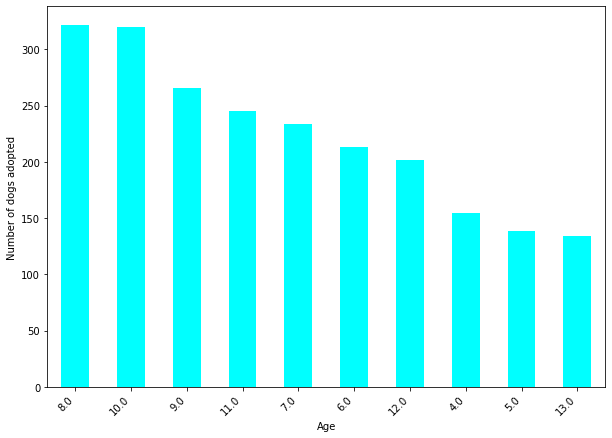

In [7]:
adoption.groupby('age')['ID'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'cyan', figsize=(10,7))
plt.xticks(rotation=45, ha="right")
plt.xlabel('Age')
plt.ylabel('Number of dogs adopted')
plt.show()

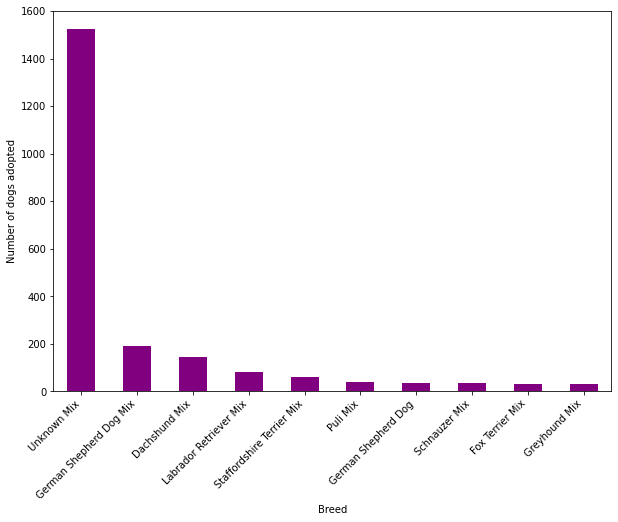

In [8]:
adoption.groupby('breed')['ID'].count().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize=(10,7), color ='purple' )
plt.xticks(rotation=45, ha="right")
plt.xlabel('Breed')
plt.ylabel('Number of dogs adopted')
plt.show()


In [18]:
aggregate_size_coat_and_color = adoption.groupby(['coat', 'size', 'color'])['ID'].count().sort_values(ascending=False).reset_index().head(10)
aggregate_size_coat_and_color.rename(columns={'ID': 'Total'})

,coat,size,color,Total
0,short,medium,black,249
1,short,medium,brown,141
2,short,medium,black and brown,133
3,medium,medium,black,116
4,short,medium,yellow-brown,113
5,short,medium,black and white,93
6,short,medium,apricot,74
7,short,medium,black and tan,68
8,short,medium,brown and white,65
9,short,medium,striped,59


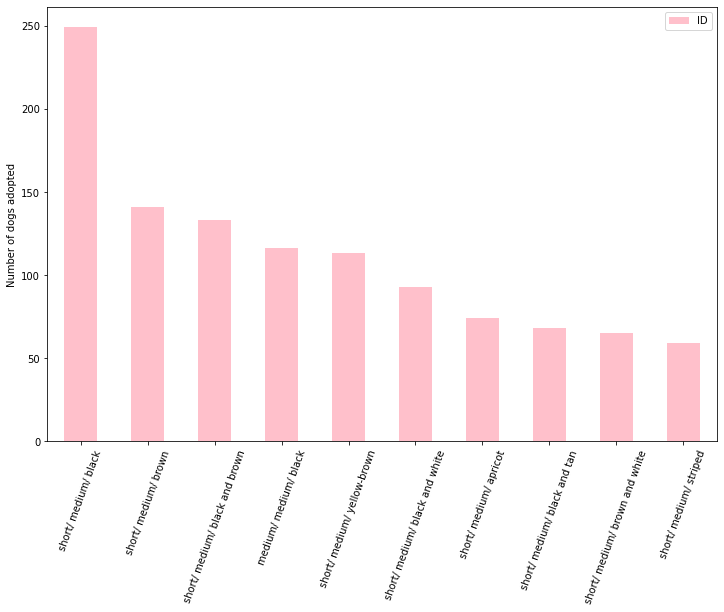

In [41]:
x_axis_labels = []

for index, row in aggregate_size_coat_and_color.iterrows():
    x_axis_labels.append(row['coat'] + '/ ' + row['size'] + '/ ' + row['color'])

fig, ax = plt.subplots(figsize=(12,8))
aggregate_size_coat_and_color.plot( ax = ax, kind = 'bar', color ='pink')
ax.set_xticklabels(x_axis_labels)
plt.xticks(rotation=70)
plt.ylabel('Number of dogs adopted')
plt.show()
 


In [42]:
aggregate_sex_and_neureted = adoption.groupby(['neutered', 'sex', 'housebroken'])['ID'].count().sort_values(ascending=False).reset_index()
aggregate_sex_and_neureted.rename(columns={'ID': 'Total'})

 

,neutered,sex,housebroken,Total
0,yes,female,yes,110
1,yes,male,yes,79
2,no,male,yes,72
3,no,female,yes,33
4,no,male,no,22
5,no,female,no,10
6,yes,male,no,9
7,yes,female,no,3


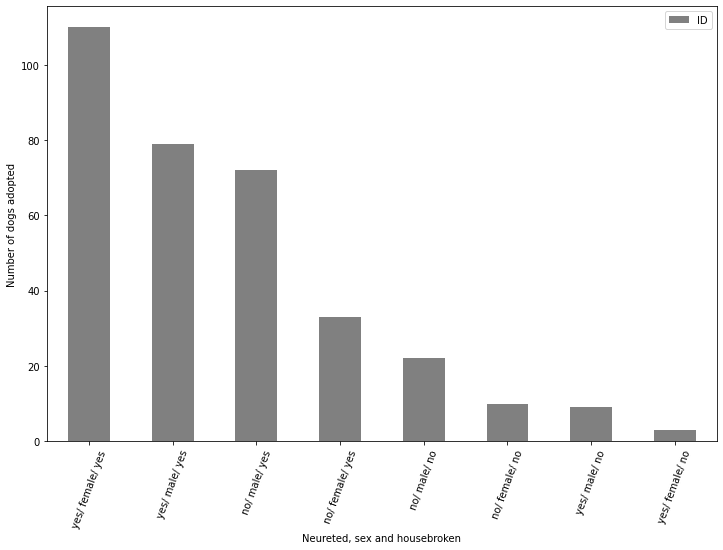

In [44]:
x_axis_labels = []

for index, row in aggregate_sex_and_neureted.iterrows():
    x_axis_labels.append(row['neutered'] + '/ ' + row['sex'] + '/ ' + row['housebroken'])

fig, ax = plt.subplots(figsize=(12,8))
aggregate_sex_and_neureted.plot( ax = ax, kind = 'bar', color ='gray')
ax.set_xticklabels(x_axis_labels)
plt.xticks(rotation=70)
plt.xlabel('Neureted, sex and housebroken')
plt.ylabel('Number of dogs adopted')
plt.show()

In [12]:
 aggregate_likespeople_and_children = adoption.groupby(['likes_people', 'likes_children'])['ID'].count().sort_values(ascending=False).reset_index()
 aggregate_likespeople_and_children.rename(columns={'ID': 'Total'})

,likes_people,likes_children,Total
0,yes,yes,1118
1,yes,no,40
2,no,no,5


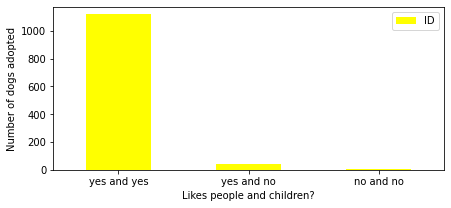

In [73]:
x_axis_labels = []

for index, row in aggregate_likespeople_and_children.iterrows():
    x_axis_labels.append(row['likes_people'] + ' and ' + row['likes_children'])

fig, ax = plt.subplots(figsize=(7,3))
aggregate_likespeople_and_children.plot( ax = ax, kind = 'bar', color ='yellow')
ax.set_xticklabels(x_axis_labels)
plt.xticks(rotation=0)
plt.xlabel('Likes people and children?')
plt.ylabel('Number of dogs adopted')
plt.show()

In [13]:
aggregate_getalongmales_females_cats = adoption.groupby(['get_along_males', 'get_along_females', 'get_along_cats'])['ID'].count().sort_values(ascending=False).reset_index()
aggregate_getalongmales_females_cats.rename(columns={'ID': 'Total'})

,get_along_males,get_along_females,get_along_cats,Total
0,yes,yes,yes,233
1,yes,yes,no,73
2,no,no,no,25
3,no,yes,no,22
4,no,yes,yes,7
5,yes,no,no,6
6,yes,no,yes,2
7,no,no,yes,2


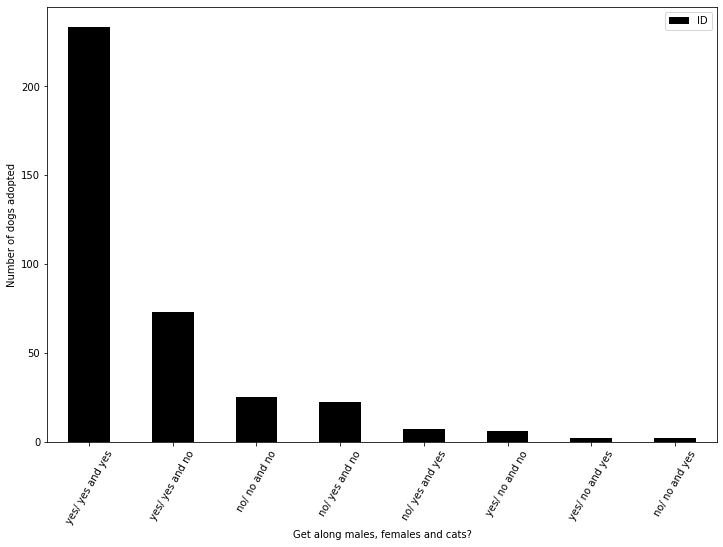

In [70]:
x_axis_labels = []

for index, row in aggregate_getalongmales_females_cats.iterrows():
    x_axis_labels.append(row['get_along_males'] + '/ ' + row['get_along_females'] + ' and ' + row['get_along_cats'])

fig, ax = plt.subplots(figsize=(12,8))
aggregate_getalongmales_females_cats.plot( ax = ax, kind = 'bar', color ='black')
ax.set_xticklabels(x_axis_labels)
plt.xticks(rotation=60)
plt.xlabel('Get along males, females and cats?')
plt.ylabel('Number of dogs adopted')
plt.show()

In [63]:
aggregate_dogs_keepin = adoption.groupby('keep_in')['ID'].count().sort_values(ascending=False).reset_index()
aggregate_dogs_keepin.rename(columns={'ID': 'Total'})

,keep_in,Total
0,both flat and garden,1223
1,garden,510
2,flat,181


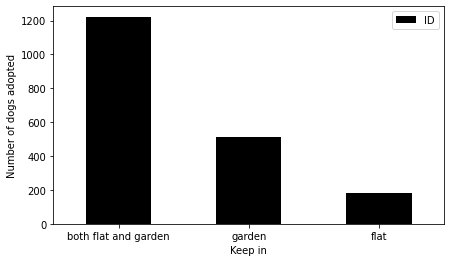

In [68]:
x_axis_labels = []

for index, row in aggregate_dogs_keepin.iterrows():
    x_axis_labels.append(row['keep_in'])

fig, ax = plt.subplots(figsize=(7,4))
aggregate_dogs_keepin.plot( ax = ax, kind = 'bar', color ='black')
ax.set_xticklabels(x_axis_labels)
plt.xticks(rotation=0)
plt.xlabel('Keep in')
plt.ylabel('Number of dogs adopted')
plt.show()

In [0]:
adoption['adoptable_from'] = pd.to_datetime(adoption['adoptable_from'], errors='coerce') #convertendo string em data 
adoption_year = adoption['adoptable_from'].dt.year #extraindo apenas o ano da data
adoption_year

In [0]:
adoption_per_year = adoption.groupby(adoption_year)['ID'].count()
adoption_per_year

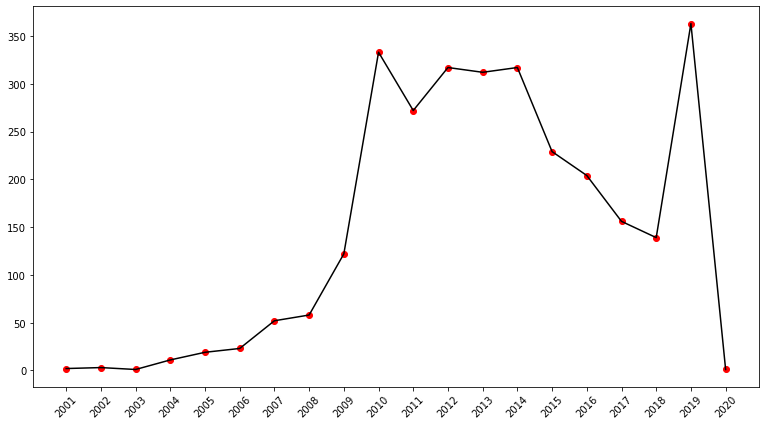

In [117]:
plt.figure(figsize=(13,7))
plt.plot(adoption_per_year.index, adoption_per_year.values, color='black')
plt.scatter(x = adoption_per_year.index , y= adoption_per_year.values, color='red')

plt.xticks(adoption_per_year.index, adoption_per_year.index, rotation=45)
 #defini x e y pq printei o adoption_per_year e a primeira coluna é index e a segunda é values
plt.show()

In [118]:
adoption_month = adoption['adoptable_from'].dt.month #extraindo apenas o ano da data
adoption_month

0       12
1       12
2       12
3       12
4       12
        ..
2929    12
2930     8
2931     9
2932    11
2933     4
Name: adoptable_from, Length: 2934, dtype: int64

In [0]:
adoption_per_month = adoption.groupby(adoption_month)['ID'].count()
adoption_per_month

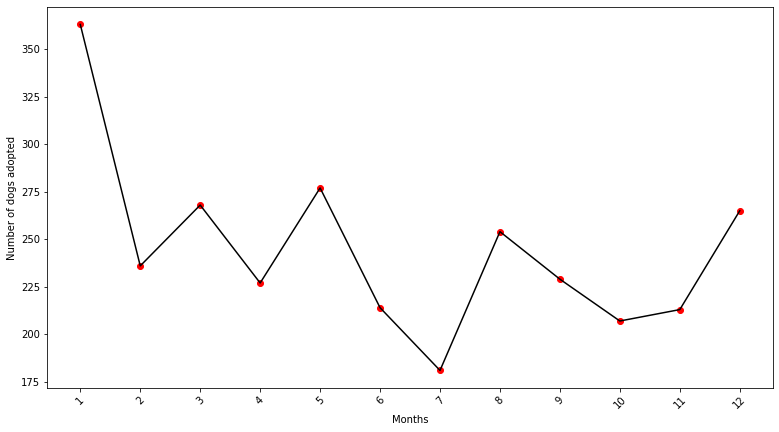

In [121]:
plt.figure(figsize=(13,7))
plt.plot(adoption_per_month.index, adoption_per_month.values, color='black')
plt.scatter(x = adoption_per_month.index , y= adoption_per_month.values, color='red')

plt.xticks(adoption_per_month.index, adoption_per_month.index, rotation=45)
plt.xlabel('Months')
plt.ylabel('Number of dogs adopted')
plt.show()